# PROYECTO CIENCIA DE DATOS  -  Sistema de Asistencia para Limitados Visuales en la Unab

Integrantes:  
- Angiela Vargas Pérez
- Juan Pérez Bayona

Docente:      
- Alfredo Díaz Claro


**DESCRIPCIÓN:**

El objetivo es desarrollar una aplicación de ayuda para personas con discapacidad visual en la Universidad (Unab), que permita conocer de forma interactiva el Laboratorio Smart Region Lab. La aplicación capturará imágenes de diferentes áreas, identificará espacios y equipos, y generará información hablada acerca de cada uno. Además, contará con un sistema interactivo basado en una red generativa de voz y texto que responderá preguntas y ofrecerá más detalles a los usuarios.

**OBJETIVOS:**

***Accesibilidad y Orientación:***

Permitir que personas con limitaciones visuales puedan conocer los distintos espacios, áreas y equipos del Smart Region Lab mediante descripciones de audio.​

***Captura y Procesamiento de Imágenes:***

Utilizar técnicas de visión por computadora para reconocer y clasificar áreas y equipos a partir de fotografías.

***Generación de Información:***

Integrar un sistema de generación de voz y texto (mediante modelos generativos) que no solo describa los espacios, sino que también responda preguntas y amplíe la información según la interacción del usuario.

***Interactividad y Respuesta Dinámica:***

Ofrecer un sistema interactivo en el que el usuario pueda realizar consultas y recibir respuestas detalladas sobre los equipos, áreas y funciones de cada espacio.


# **EXPLORACIÓN Y PREPROCESAMIENTO DE LA DATASET**

Se tomaron muestras de cada clase, son 20 clases, las cuales se aumentaron, luego se proporcionaron con un tamaño de imagen de (224,224). Posterior a esto se realizó labelImg a partir de bounding boxes mediante la plataforma gratuita de Roboflow, en la cual se asignaron los datos de entrenamiento, de validación y de prueba.

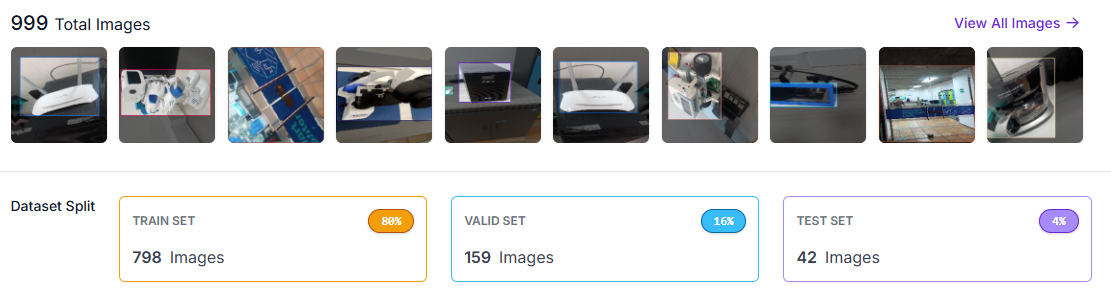

## Importar librerías


In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
%pip show ultralytics

Name: ultralytics
Version: 8.3.133
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [ ]:
import torch
import os
import cv2
import shutil
import zipfile
import requests
import random
from ultralytics import YOLO
from IPython.display import Image, clear_output

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Importar la dataset

La dataset se encuentra organizada de la siguiente manera:

```text
dataset/
├── train/
│   ├── images/
│   └── labels/
├── valid/
│    ├── images/
│    └── labels/
├── test/
│    ├── images/
│    └── labels/
├── data.yaml
│
├── README.dataset
│
|── README.roboflow
```

In [ ]:
# Definir rutas base
base_path = "/content"
zip_path = os.path.join(base_path, "LABCD.v2i.yolov8.zip")

def download_zip(url, dest):
    response = requests.get(url, stream=True)
    with open(dest, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print("Archivo ZIP descargado correctamente.")

def extract_zip(zip_file, dest_folder):
    dataset_folder = os.path.join(dest_folder, "dataset")  # Extraer en "dataset/"
    os.makedirs(dataset_folder, exist_ok=True)  # Asegurar que la carpeta existe
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(dataset_folder)  # Extraer en dataset/
    print(f"Contenido extraído en {dataset_folder}: {os.listdir(dataset_folder)}")


# Ejecutar procesos
download_zip("https://github.com/Angiela-Vargas/Data-Science-LABCD/blob/main/LABCD.v2i.yolov8.zip?raw=true", zip_path)
extract_zip(zip_path, base_path)

Archivo ZIP descargado correctamente.
Contenido extraído en /content/dataset: ['data.yaml', 'valid', 'test', 'README.roboflow.txt', 'README.dataset.txt', 'train']


## Verificar la descarga y extracción

In [ ]:
labels_val_path = "/content/dataset/valid/labels"  # Ajusta la ruta según tu dataset

if os.path.exists(labels_val_path):
    label_files = [f for f in os.listdir(labels_val_path) if f.endswith(".txt")]
    if len(label_files) == 0:
        print("⚠️ No se encontraron etiquetas en:", labels_val_path)
    else:
        print(f"✅ Se encontraron {len(label_files)} archivos de etiquetas.")
else:
    print("⚠️ La carpeta de etiquetas no existe.")

✅ Se encontraron 159 archivos de etiquetas.


## Validar estructura completa del dataset

In [ ]:
base_path = "/content/dataset"
subdirs = ["train/images", "train/labels", "valid/images", "valid/labels", "test/images", "test/labels"]

for subdir in subdirs:
    full_path = os.path.join(base_path, subdir)
    if not os.path.exists(full_path):
        print(f"🚨 ERROR: No se encontró la carpeta {full_path}")
    else:
        print(f"✅ {full_path} encontrado, contiene {len(os.listdir(full_path))} archivos")

✅ /content/dataset/train/images encontrado, contiene 798 archivos
✅ /content/dataset/train/labels encontrado, contiene 798 archivos
✅ /content/dataset/valid/images encontrado, contiene 159 archivos
✅ /content/dataset/valid/labels encontrado, contiene 159 archivos
✅ /content/dataset/test/images encontrado, contiene 42 archivos
✅ /content/dataset/test/labels encontrado, contiene 42 archivos


### Edición del archivo `dataset.yaml`

El archivo `.yaml` define:
- Ruta base de los datos.
- Subcarpetas de entrenamiento, validación y prueba.
- Número de clases (`nc`).
- Nombres de las clases.

```yaml

train: ../train/images

val: ../valid/images

test: ../test/images

nc: 21

names: ['Microscopio óptico avanzado', 'Agitador magnético con placa calefactora', 'Aire acondicionado YORK', 'Cafetera', 'Computador', 'Control remoto de robot', 'Control remoto de Smart TV', 'Estación de soldadura por aire caliente', 'Impresora 3D Creality K1 Max', 'Mini fresadora CNC', 'Mouse', 'Objetos (varios)', 'Osciloscopio digital Rigol DS1202ZE', 'Puerta', 'Robot humanoide AULER', 'Robot Lego Mindstorms EV3', 'Router', 'Sensor de suelo integrado', 'Tablet', 'Tomacorrientes 110V', 'UPS Netio']

roboflow:
  workspace: labcd
  project: labcd
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/labcd/labcd/dataset/2



## **Nombres:**

  0: Microscopio óptico avanzado

  1: Agitador magnético con placa calefactora

  2: Aire acondicionado YORK

  3: Cafetera

  4: Computador

  5: Control remoto de robot

  6: Control remoto de Smart TV

  7: Estación de soldadura por aire caliente

  8: Impresora 3D Creality K1 Max

  9: Mini fresadora CNC

 10: Mouse

 11: Objetos (varios)

 12: Osciloscopio digital Rigol DS1202ZE

 13: Puerta

 14: Robot humanoide AULER

 15: Robot Lego Mindstorms EV3

 16: Router

 17: Sensor de suelo integrado

 18: Tablet

 19: Tomacorrientes 110V

 20: UPS Netio

## Cargar modelo base YOLOv8 y Cargar pesos preentrenados YOLOv8

Se carga el modelo YOLOv8 con pesos base (`yolov8s.pt`), listos para ser ajustados a nuestro conjunto de datos.



In [ ]:
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 95.9MB/s]


## Entrenamiento del modelo YOLOv8 con la dataset creada en Roboflow

In [ ]:
model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=640,batch=16)

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]

Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 19                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 120MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 350.8±108.0 MB/s, size: 9.7 KB)


train: Scanning /content/dataset/train/labels... 798 images, 0 backgrounds, 0 corrupt: 100%|██████████| 798/798 [00:00<00:00, 2430.51it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 247.0±129.8 MB/s, size: 7.9 KB)


val: Scanning /content/dataset/valid/labels... 159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<00:00, 1646.72it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.73G      1.054       4.52      1.552         41        640: 100%|██████████| 50/50 [00:17<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        159        194      0.425      0.303      0.307      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.53G     0.8509      2.498      1.386         39        640: 100%|██████████| 50/50 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        159        194      0.566       0.55        0.6      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.56G     0.8513      1.937      1.351         35        640: 100%|██████████| 50/50 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        159        194      0.758      0.629      0.743      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.6G     0.8519      1.639      1.351         36        640: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        159        194      0.736      0.714      0.787      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.64G     0.8364      1.437      1.349         35        640: 100%|██████████| 50/50 [00:14<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        159        194      0.901      0.652      0.815      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.67G     0.7979      1.274      1.306         39        640: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all        159        194       0.87      0.757      0.864      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.71G     0.7869      1.211        1.3         51        640: 100%|██████████| 50/50 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        159        194      0.844      0.869      0.911      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.74G     0.7422      1.132      1.273         36        640: 100%|██████████| 50/50 [00:14<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        159        194      0.849      0.867      0.943      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.78G      0.716       1.04      1.244         38        640: 100%|██████████| 50/50 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        159        194      0.873      0.886      0.941      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.82G     0.7356      1.016      1.268         42        640: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]

                   all        159        194      0.904      0.898      0.932      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.85G     0.7262     0.9726      1.249         43        640: 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        159        194      0.945      0.885      0.955      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.89G     0.6958      0.892      1.234         30        640: 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

                   all        159        194      0.877       0.87      0.939       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.93G     0.6587     0.8415      1.202         41        640: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        159        194      0.923      0.901      0.955       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.96G     0.6504     0.8053      1.193         35        640: 100%|██████████| 50/50 [00:14<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        159        194      0.949       0.91      0.971      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         5G     0.6603     0.8013      1.208         24        640: 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        159        194      0.932      0.923      0.974      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.04G     0.6689     0.8002        1.2         43        640: 100%|██████████| 50/50 [00:14<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all        159        194      0.959      0.914       0.97      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.07G       0.63     0.7703       1.18         29        640: 100%|██████████| 50/50 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]

                   all        159        194      0.945      0.919      0.967      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.11G      0.634     0.7311      1.183         42        640: 100%|██████████| 50/50 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        159        194      0.929      0.905      0.951      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.14G     0.6217     0.7294      1.161         34        640: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        159        194      0.884      0.952      0.978      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.18G     0.6012     0.7059       1.16         33        640: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        159        194      0.935      0.933      0.976       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.22G     0.6283     0.6996       1.17         33        640: 100%|██████████| 50/50 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all        159        194      0.964       0.92      0.972      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.25G     0.5802     0.6207      1.142         39        640: 100%|██████████| 50/50 [00:14<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        159        194      0.968      0.908      0.969      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.29G     0.5565     0.6294       1.13         46        640: 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        159        194      0.961      0.928      0.981      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.33G     0.5585     0.6079      1.121         40        640: 100%|██████████| 50/50 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        159        194       0.95       0.93      0.976      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.36G     0.5514     0.6062      1.117         33        640: 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        159        194      0.953      0.943      0.977      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.4G     0.5389     0.5849       1.11         33        640: 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        159        194      0.952      0.949      0.979      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.44G     0.5429     0.5933      1.126         44        640: 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        159        194      0.973      0.944      0.987      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.47G     0.5283     0.5578       1.11         39        640: 100%|██████████| 50/50 [00:14<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        159        194      0.971      0.929      0.987      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.51G     0.5471     0.5602      1.112         41        640: 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        159        194      0.975      0.946      0.981      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.54G     0.5138     0.5354      1.095         42        640: 100%|██████████| 50/50 [00:15<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        159        194      0.977      0.947       0.98      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.58G     0.5314     0.5327      1.112         38        640: 100%|██████████| 50/50 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        159        194      0.962      0.935      0.974      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.62G     0.4995     0.5185      1.094         37        640: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        159        194      0.956      0.948      0.978      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.65G     0.4801     0.4771      1.076         42        640: 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        159        194      0.976      0.939      0.975       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.69G     0.4963     0.5053      1.085         43        640: 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        159        194      0.978      0.961      0.983      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.73G     0.4957     0.5052      1.087         35        640: 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        159        194      0.979      0.959      0.981      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.76G     0.4785     0.4669      1.073         48        640: 100%|██████████| 50/50 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]

                   all        159        194      0.978      0.952      0.979      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       5.8G     0.4677      0.468      1.059         42        640: 100%|██████████| 50/50 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        159        194      0.979       0.96      0.984      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.84G     0.4666     0.4422      1.072         32        640: 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        159        194      0.977      0.952      0.981       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.87G     0.4737     0.4513      1.066         36        640: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        159        194      0.962      0.959      0.981      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.23G     0.4624     0.4338      1.071         45        640: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        159        194      0.971      0.957      0.982      0.895


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.27G     0.3496     0.3528     0.9887         16        640: 100%|██████████| 50/50 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        159        194      0.982      0.945       0.98      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.31G     0.3377     0.3187     0.9964         17        640: 100%|██████████| 50/50 [00:14<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        159        194      0.968      0.967      0.981      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.34G     0.3198     0.2871     0.9851         17        640: 100%|██████████| 50/50 [00:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        159        194      0.977      0.956      0.981      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.38G     0.3248     0.2864      0.964         14        640: 100%|██████████| 50/50 [00:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        159        194       0.98       0.95      0.982      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.42G     0.3049     0.2649     0.9583         15        640: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        159        194      0.984      0.956      0.981      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.45G     0.2923     0.2619     0.9408         19        640: 100%|██████████| 50/50 [00:14<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        159        194      0.984      0.954      0.981      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.49G     0.2952     0.2586      0.944         19        640: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        159        194      0.981      0.957       0.98      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.53G     0.2853     0.2581     0.9492         17        640: 100%|██████████| 50/50 [00:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        159        194      0.986      0.954      0.981      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.56G     0.2825     0.2453     0.9509         19        640: 100%|██████████| 50/50 [00:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]

                   all        159        194      0.986      0.957      0.981      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       6.6G     0.2769     0.2369     0.9355         16        640: 100%|██████████| 50/50 [00:14<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        159        194      0.987      0.957      0.982      0.905



50 epochs completed in 0.236 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


                   all        159        194      0.987      0.957      0.982      0.905
advanced_optical_microscope          9          9      0.991          1      0.995       0.89
agitador_magnetico_placa_calentamiento_EQ_AMPC1C          9          9      0.991          1      0.995      0.884
aire_acondicionado_YORK          6          6      0.984          1      0.995       0.96
              cafetera          8          8      0.994          1      0.995      0.949
            computador         10         19      0.944      0.895      0.983      0.818
  control_remoto_robot         11         11      0.988      0.727       0.79      0.732
control_remoto_smart_tv          8          8      0.994          1      0.995      0.918
estacion_soldadura_aire_caliente         10         10      0.992          1      0.995      0.908
impresora_3d_creality_k1_max          8          8          1      0.884      0.995      0.841
    mini_fresadora_cnc          8          8      0.989      

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7956bb3d3b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 315.1±130.2 MB/s, size: 7.0 KB)


val: Scanning /content/dataset/valid/labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]


                   all        159        194      0.987      0.957      0.982      0.906
advanced_optical_microscope          9          9      0.991          1      0.995       0.89
agitador_magnetico_placa_calentamiento_EQ_AMPC1C          9          9      0.991          1      0.995      0.884
aire_acondicionado_YORK          6          6      0.984          1      0.995       0.96
              cafetera          8          8      0.994          1      0.995      0.949
            computador         10         19      0.944      0.895      0.983      0.827
  control_remoto_robot         11         11      0.988      0.727       0.79      0.732
control_remoto_smart_tv          8          8      0.994          1      0.995      0.918
estacion_soldadura_aire_caliente         10         10      0.992          1      0.995      0.909
impresora_3d_creality_k1_max          8          8          1      0.884      0.995      0.841
    mini_fresadora_cnc          8          8      0.989      

## Testear el modelo

In [ ]:
# Cargar la imagen
image_path = "/content/dataset/test/images/augmented_0_jpg.rf.bfdcb4435da150ef47c97b4b1c2ab783.jpg"

image = cv2.imread(image_path)
results = model.predict(image_path, save=True, imgsz=640)

# Guardar la imagen
cv2.imwrite("imagen.jpg", image)


image 1/1 /content/dataset/test/images/augmented_0_jpg.rf.bfdcb4435da150ef47c97b4b1c2ab783.jpg: 640x640 1 puerta, 16.0ms
Speed: 4.8ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train3


True

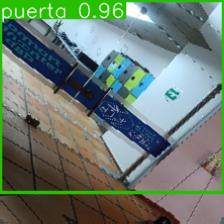

In [ ]:
results[0].show()

Realizaremos una predicción de todas las imagenes que se encuentran en la carpeta de test


image 1/1 /content/dataset/test/images/original_15_jpg.rf.acb378137bded5d264a582f7e5458adb.jpg: 640x640 1 puerta, 16.0ms
Speed: 2.7ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train4
Predicción realizada para: original_15_jpg.rf.acb378137bded5d264a582f7e5458adb.jpg


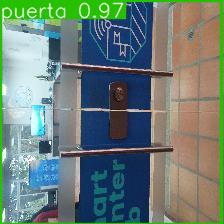


image 1/1 /content/dataset/test/images/original_4_jpg.rf.e09549b155ad6a60c032e23436495d22.jpg: 640x640 3 tomacorrientes_110Vs, 16.0ms
Speed: 3.5ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train5
Predicción realizada para: original_4_jpg.rf.e09549b155ad6a60c032e23436495d22.jpg


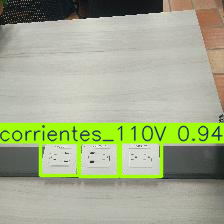


image 1/1 /content/dataset/test/images/augmented_21_jpg.rf.f36c7adf607650bca9f3a9842fc56337.jpg: 640x640 1 advanced_optical_microscope, 1 agitador_magnetico_placa_calentamiento_EQ_AMPC1C, 16.0ms
Speed: 5.0ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train6
Predicción realizada para: augmented_21_jpg.rf.f36c7adf607650bca9f3a9842fc56337.jpg


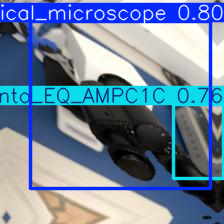


image 1/1 /content/dataset/test/images/original_27_jpg.rf.61885bf47ed65ba4e7840b289cc7aab0.jpg: 640x640 1 mini_fresadora_cnc, 16.0ms
Speed: 4.7ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train7
Predicción realizada para: original_27_jpg.rf.61885bf47ed65ba4e7840b289cc7aab0.jpg


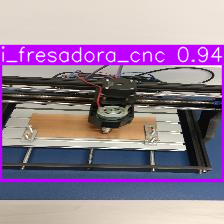


image 1/1 /content/dataset/test/images/original_5_jpg.rf.f0dbdc2b69ee008d6ed8f30a5a5efe62.jpg: 640x640 1 tablet, 16.0ms
Speed: 4.1ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train8
Predicción realizada para: original_5_jpg.rf.f0dbdc2b69ee008d6ed8f30a5a5efe62.jpg


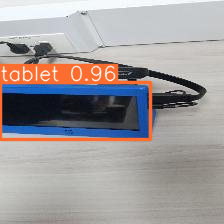


image 1/1 /content/dataset/test/images/original_22_jpg.rf.26d8c2b9f4f761749f26624f179c4b86.jpg: 640x640 1 aire_acondicionado_YORK, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train9
Predicción realizada para: original_22_jpg.rf.26d8c2b9f4f761749f26624f179c4b86.jpg


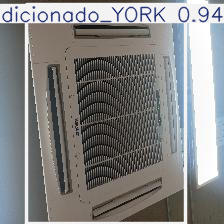


image 1/1 /content/dataset/test/images/original_12_jpg.rf.90a8cac4ca5a41bdf47e7869ee2556b3.jpg: 640x640 1 estacion_soldadura_aire_caliente, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train10
Predicción realizada para: original_12_jpg.rf.90a8cac4ca5a41bdf47e7869ee2556b3.jpg


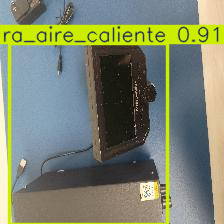


image 1/1 /content/dataset/test/images/original_9_jpg.rf.252e00adb381960466ba9339f30a8a16.jpg: 640x640 1 soil_integrated_sensor, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train11
Predicción realizada para: original_9_jpg.rf.252e00adb381960466ba9339f30a8a16.jpg


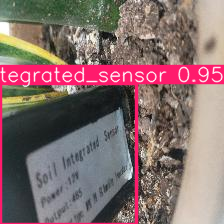


image 1/1 /content/dataset/test/images/original_8_jpg.rf.0f3fc8cce4e1b4eddec95b1b3c2419d6.jpg: 640x640 1 soil_integrated_sensor, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train12
Predicción realizada para: original_8_jpg.rf.0f3fc8cce4e1b4eddec95b1b3c2419d6.jpg


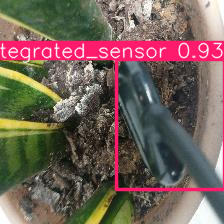


image 1/1 /content/dataset/test/images/original_4_jpg.rf.5944ee2318677ec8148813d88ecfb71f.jpg: 640x640 1 impresora_3d_creality_k1_max, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train13
Predicción realizada para: original_4_jpg.rf.5944ee2318677ec8148813d88ecfb71f.jpg


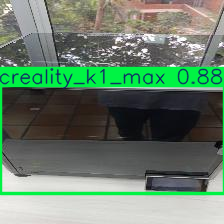


image 1/1 /content/dataset/test/images/original_12_jpg.rf.41011768ee60b69e3c8a3343fbe03ed9.jpg: 640x640 2 computadors, 15.5ms
Speed: 3.5ms preprocess, 15.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train14
Predicción realizada para: original_12_jpg.rf.41011768ee60b69e3c8a3343fbe03ed9.jpg


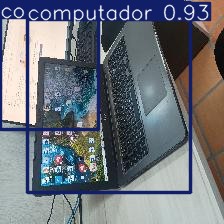


image 1/1 /content/dataset/test/images/original_25_jpg.rf.f2c1b329cf9e893f5f105fe692c32485.jpg: 640x640 1 control_remoto_robot, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train15
Predicción realizada para: original_25_jpg.rf.f2c1b329cf9e893f5f105fe692c32485.jpg


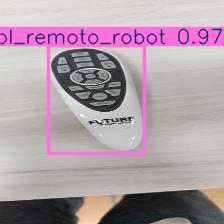


image 1/1 /content/dataset/test/images/augmented_23_jpg.rf.5947bc3c7fd153c9b407187fa0628f9c.jpg: 640x640 1 impresora_3d_creality_k1_max, 18.3ms
Speed: 3.1ms preprocess, 18.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train16
Predicción realizada para: augmented_23_jpg.rf.5947bc3c7fd153c9b407187fa0628f9c.jpg


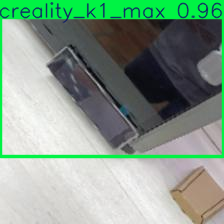


image 1/1 /content/dataset/test/images/original_19_jpg.rf.0e1ac3dc2949887e8fb82ba16d75935e.jpg: 640x640 1 router, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train17
Predicción realizada para: original_19_jpg.rf.0e1ac3dc2949887e8fb82ba16d75935e.jpg


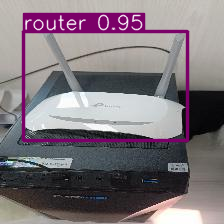


image 1/1 /content/dataset/test/images/original_16_jpg.rf.1e719bdba9a24619a7508f67b5745c68.jpg: 640x640 1 robot_humanoide_AULER, 1 tomacorrientes_110V, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train18
Predicción realizada para: original_16_jpg.rf.1e719bdba9a24619a7508f67b5745c68.jpg


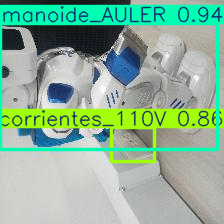


image 1/1 /content/dataset/test/images/augmented_22_jpg.rf.afb8b892cadc26680d807bb83b63eba4.jpg: 640x640 1 advanced_optical_microscope, 15.3ms
Speed: 2.7ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train19
Predicción realizada para: augmented_22_jpg.rf.afb8b892cadc26680d807bb83b63eba4.jpg


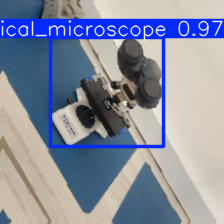


image 1/1 /content/dataset/test/images/augmented_27_jpg.rf.42ce33148b8f0b0deec18ce56973e575.jpg: 640x640 1 robot_lego_mindstorms_ev3, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train20
Predicción realizada para: augmented_27_jpg.rf.42ce33148b8f0b0deec18ce56973e575.jpg


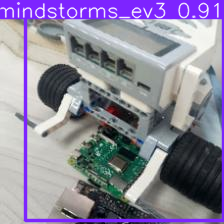


image 1/1 /content/dataset/test/images/original_14_jpg.rf.e5fff5f95d57196046e8a760af20ac05.jpg: 640x640 1 control_remoto_robot, 17.8ms
Speed: 3.0ms preprocess, 17.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train21
Predicción realizada para: original_14_jpg.rf.e5fff5f95d57196046e8a760af20ac05.jpg


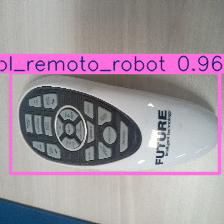


image 1/1 /content/dataset/test/images/original_9_jpg.rf.5d99ab633ab90cae73f2ae80480494bb.jpg: 640x640 3 tomacorrientes_110Vs, 15.4ms
Speed: 4.7ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train22
Predicción realizada para: original_9_jpg.rf.5d99ab633ab90cae73f2ae80480494bb.jpg


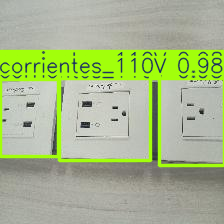


image 1/1 /content/dataset/test/images/augmented_29_jpg.rf.fbe6d6242de361fc84a2ec71acc825d0.jpg: 640x640 1 mouse, 15.3ms
Speed: 5.4ms preprocess, 15.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train23
Predicción realizada para: augmented_29_jpg.rf.fbe6d6242de361fc84a2ec71acc825d0.jpg


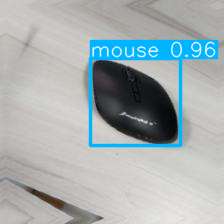


image 1/1 /content/dataset/test/images/augmented_0_jpg.rf.bfdcb4435da150ef47c97b4b1c2ab783.jpg: 640x640 1 puerta, 15.5ms
Speed: 3.6ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train24
Predicción realizada para: augmented_0_jpg.rf.bfdcb4435da150ef47c97b4b1c2ab783.jpg


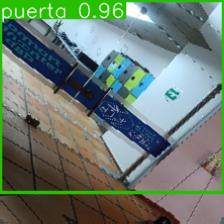


image 1/1 /content/dataset/test/images/original_9_jpg.rf.ef9bcf0a7409a09ce630c36cdf1991d6.jpg: 640x640 1 ups_netio, 15.3ms
Speed: 3.1ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train25
Predicción realizada para: original_9_jpg.rf.ef9bcf0a7409a09ce630c36cdf1991d6.jpg


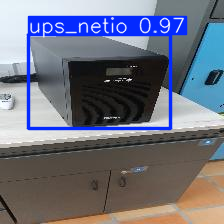


image 1/1 /content/dataset/test/images/original_4_jpg.rf.196ae5f6940881a6e5c0972970826095.jpg: 640x640 1 router, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train26
Predicción realizada para: original_4_jpg.rf.196ae5f6940881a6e5c0972970826095.jpg


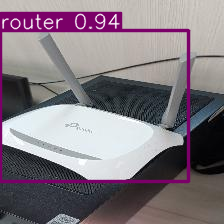


image 1/1 /content/dataset/test/images/augmented_10_jpg.rf.1d0da38f230d0c088ef56a86b9c8923a.jpg: 640x640 1 osciloscopio_digital_ rigol_ds1202ze, 15.4ms
Speed: 4.7ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train27
Predicción realizada para: augmented_10_jpg.rf.1d0da38f230d0c088ef56a86b9c8923a.jpg


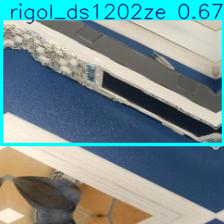


image 1/1 /content/dataset/test/images/augmented_21_jpg.rf.51e8a17c3e2aa84afe38c69d7ca469ae.jpg: 640x640 1 control_remoto_smart_tv, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train28
Predicción realizada para: augmented_21_jpg.rf.51e8a17c3e2aa84afe38c69d7ca469ae.jpg


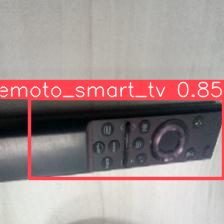


image 1/1 /content/dataset/test/images/original_23_jpg.rf.ce54670e073ca0ab9ca6f8a1d70a8ada.jpg: 640x640 1 aire_acondicionado_YORK, 15.5ms
Speed: 3.4ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train29
Predicción realizada para: original_23_jpg.rf.ce54670e073ca0ab9ca6f8a1d70a8ada.jpg


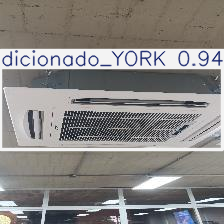


image 1/1 /content/dataset/test/images/original_24_jpg.rf.41a8fd6532a0b2ac77e597c8bb7352c3.jpg: 640x640 1 estacion_soldadura_aire_caliente, 1 osciloscopio_digital_ rigol_ds1202ze, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train30
Predicción realizada para: original_24_jpg.rf.41a8fd6532a0b2ac77e597c8bb7352c3.jpg


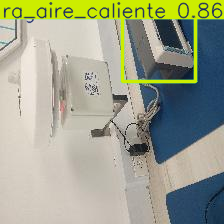


image 1/1 /content/dataset/test/images/augmented_20_jpg.rf.4670a12ef6fcb92b0d52a768c2be7b32.jpg: 640x640 1 control_remoto_smart_tv, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train31
Predicción realizada para: augmented_20_jpg.rf.4670a12ef6fcb92b0d52a768c2be7b32.jpg


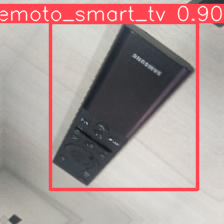


image 1/1 /content/dataset/test/images/original_5_jpg.rf.7231c3789de616d34d76ef58eca22532.jpg: 640x640 1 robot_lego_mindstorms_ev3, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train32
Predicción realizada para: original_5_jpg.rf.7231c3789de616d34d76ef58eca22532.jpg


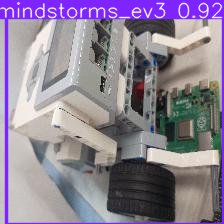


image 1/1 /content/dataset/test/images/original_26_jpg.rf.605bb311169656fec92dd225a2269e69.jpg: 640x640 1 agitador_magnetico_placa_calentamiento_EQ_AMPC1C, 15.3ms
Speed: 6.4ms preprocess, 15.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train33
Predicción realizada para: original_26_jpg.rf.605bb311169656fec92dd225a2269e69.jpg


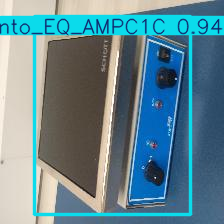


image 1/1 /content/dataset/test/images/original_34_jpg.rf.bd37e4f8274320ad07eb4032173c3dd1.jpg: 640x640 1 robot_humanoide_AULER, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train34
Predicción realizada para: original_34_jpg.rf.bd37e4f8274320ad07eb4032173c3dd1.jpg


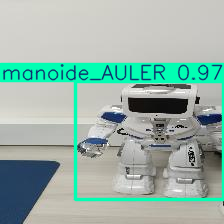


image 1/1 /content/dataset/test/images/augmented_15_jpg.rf.61f1b39e9acafa50a282e1024b337d2a.jpg: 640x640 1 mouse, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train35
Predicción realizada para: augmented_15_jpg.rf.61f1b39e9acafa50a282e1024b337d2a.jpg


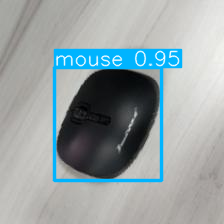


image 1/1 /content/dataset/test/images/original_6_jpg.rf.f1c488fbd83c0b3c96d924d6282f231f.jpg: 640x640 1 robot_humanoide_AULER, 1 ups_netio, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train36
Predicción realizada para: original_6_jpg.rf.f1c488fbd83c0b3c96d924d6282f231f.jpg


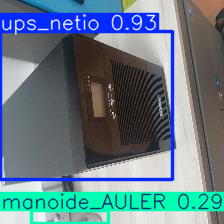


image 1/1 /content/dataset/test/images/original_4_jpg.rf.19494e83e766ba9f3a428c77d9e31440.jpg: 640x640 1 objects, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train37
Predicción realizada para: original_4_jpg.rf.19494e83e766ba9f3a428c77d9e31440.jpg


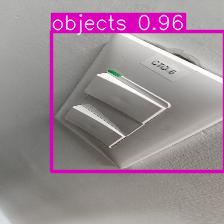


image 1/1 /content/dataset/test/images/augmented_10_jpg.rf.048b8137f1ab037bafcb60a122a9c4b5.jpg: 640x640 2 computadors, 15.4ms
Speed: 2.9ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train38
Predicción realizada para: augmented_10_jpg.rf.048b8137f1ab037bafcb60a122a9c4b5.jpg


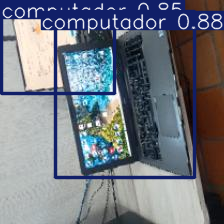


image 1/1 /content/dataset/test/images/original_6_jpg.rf.5536f36f3540d224b719c3c4dc910793.jpg: 640x640 1 computador, 1 tablet, 15.3ms
Speed: 6.4ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train39
Predicción realizada para: original_6_jpg.rf.5536f36f3540d224b719c3c4dc910793.jpg


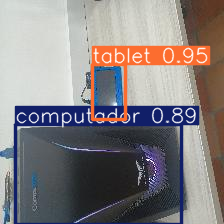


image 1/1 /content/dataset/test/images/augmented_30_jpg.rf.136b93774fdbafd2265893ae9d4ceaa5.jpg: 640x640 1 estacion_soldadura_aire_caliente, 15.3ms
Speed: 3.3ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train40
Predicción realizada para: augmented_30_jpg.rf.136b93774fdbafd2265893ae9d4ceaa5.jpg


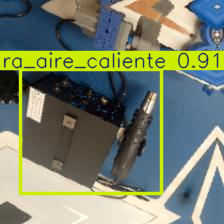


image 1/1 /content/dataset/test/images/augmented_25_jpg.rf.f747ecacf9a875f8e6e56745971f0842.jpg: 640x640 1 cafetera, 15.3ms
Speed: 5.2ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train41
Predicción realizada para: augmented_25_jpg.rf.f747ecacf9a875f8e6e56745971f0842.jpg


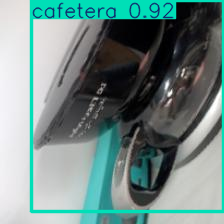


image 1/1 /content/dataset/test/images/original_25_jpg.rf.75efef35b031c00daedfb751f6dfe972.jpg: 640x640 1 agitador_magnetico_placa_calentamiento_EQ_AMPC1C, 15.5ms
Speed: 3.4ms preprocess, 15.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train42
Predicción realizada para: original_25_jpg.rf.75efef35b031c00daedfb751f6dfe972.jpg


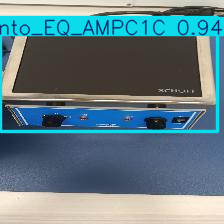


image 1/1 /content/dataset/test/images/original_3_jpg.rf.679310b227c95710baf08588dc298017.jpg: 640x640 1 objects, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train43
Predicción realizada para: original_3_jpg.rf.679310b227c95710baf08588dc298017.jpg


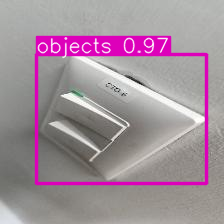


image 1/1 /content/dataset/test/images/augmented_9_jpg.rf.bf7b049a3d411b1003cb011df31a2b00.jpg: 640x640 1 mini_fresadora_cnc, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train44
Predicción realizada para: augmented_9_jpg.rf.bf7b049a3d411b1003cb011df31a2b00.jpg


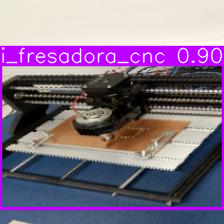


image 1/1 /content/dataset/test/images/augmented_21_jpg.rf.589ed23ebd58b17aee412e8f15e45350.jpg: 640x640 1 cafetera, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train45
Predicción realizada para: augmented_21_jpg.rf.589ed23ebd58b17aee412e8f15e45350.jpg


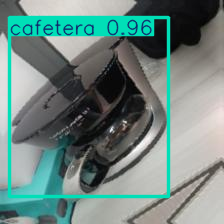

In [ ]:
#Hagamos la prediccion de todas las images que están en test

# Definir la ruta a la carpeta de imágenes de prueba
test_images_dir = "/content/dataset/test/images"

# Iterar sobre todas las imágenes en la carpeta de prueba
for filename in os.listdir(test_images_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Ajusta las extensiones si es necesario
        image_path = os.path.join(test_images_dir, filename)
        results = model.predict(image_path, save=True, imgsz=640)  # Realizar la predicción
        print(f"Predicción realizada para: {filename}")
        # Puedes acceder a las predicciones a través de results[0].boxes, results[0].probs, etc.
        # Si deseas visualizar las imágenes con las predicciones:
        results[0].show()

Ahora, para detectar en video

In [ ]:
# Ruta del video de prueba
video_source = "/content/video_LAB.mp4"

# Realizar la predicción
results = model.predict(source=video_source, conf=0.3, save=True)

print("Predicción completada y resultados guardados.")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1322) /content/video_LAB.mp4: 640x384 1 puerta, 44.0ms
video 1/1 (frame 2/1322) /content/video_LAB.mp4: 640x384 1 puerta, 10.9ms
video 1/1 (frame 3/1322) /content/video_LAB.mp4: 640x384 1 puerta, 10.8ms
video 1/1 (frame 4/1322) /content/video_LAB.mp4: 640x384 1 puerta, 11.0ms
video 1/1 (frame 5/1322) /content/video_LAB.mp4: 640x384 1 puerta, 10.8ms
video 1/1 (frame 6/1322) /content/video_LAB.mp4: 640x384 1 puerta, 10.7ms
video 1/1 (f

In [ ]:
for r in results:          # recorre todos los frames
    r.show()


## Exportación del modelo

In [ ]:
model.export(format="onnx")  # Exportar a ONNX
model.export(format="torchscript")  # Exportar a TorchScript

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 25, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 196.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.6/145.6 kB 366.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 276.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 237.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 284.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.1s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onn

'runs/detect/train/weights/best.torchscript'

In [ ]:
model.export(format="onnx",opset=12)  # export the model to ONNX format

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 25, 8400) (21.5 MB)

ONNX: starting export with onnx 1.18.0 opset 12...
ONNX: slimming with onnxslim 0.1.52...
ONNX: export success ✅ 3.4s, saved as 'runs/detect/train/weights/best.onnx' (42.7 MB)

Export complete (4.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/content/dataset/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'

In [ ]:
export_path = "runs/detect/train/weights/"
files = os.listdir(export_path)

print("Archivos exportados en:", export_path)
print(files)

Archivos exportados en: runs/detect/train/weights/
['best.torchscript', 'last.pt', 'best.onnx', 'best.pt', 'best_saved_model']


In [ ]:
#creamos la carpeta de modelo dentro de /content/dataset
import shutil
import os

# Check if the folder exists before moving it
source_path = "runs/detect/train/weights/best.pt" # Update with the actual path of your best model file
destination_path = "/content/dataset/modelo/best.pt"

if os.path.exists(source_path):
    # Create the destination directory if it doesn't exist
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)

    # Move the file
    shutil.move(source_path, destination_path)
    print(f"Model moved to: {destination_path}")
else:
    print(f"Error: Source file not found at: {source_path}")

Model moved to: /content/dataset/modelo/best.pt
